In [1]:
import json
#import jsonlines
import codecs
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%pylab inline
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from google.colab import drive
import re 
import numpy as np

needs = pd.read_csv("/content/drive/MyDrive/needs.csv")

themes = needs['Тематика обращения']
categ = needs['Категория']



In [3]:
needs

,id,Тематика обращения,Дата создания,Категория,Муниципалитет,Текст обращения
0,3087,Не чистят пандус от снега,3/17/21 12:04,Благоустройство и инфраструктура,Администрация города Чебоксары Чувашской Респу...,\nНе чистят пандус от снега вырос огромный суг...
1,3141,Претензия к обслужиыанию в общественном трансп...,4/18/21 22:32,Благоустройство и инфраструктура,Администрация города Чебоксары Чувашской Респу...,​\nСчитаю важным сообщить о непрофессионализме...
2,3352,Отсутвие освещения,9/3/21 20:04,Благоустройство и инфраструктура,Администрация Комсомольского района Чувашской ...,В Деревне Альбус Сюрбеево Комсомольского райо...
3,2718,В Больших Катрасях строят тротуар на болоте,8/2/20 13:09,Дороги,Администрация Чебоксарского района Чувашской Р...,В рамках государственной закупки № 0115300011...
4,3321,Захламление улиц Южного поселка г. Чебоксары,8/3/21 14:27,Благоустройство и инфраструктура,Администрация города Чебоксары Чувашской Респу...,"Добрый день. Подскажите, пожалуйста, почему н..."
...,...,...,...,...,...,...
3137,3282,"На детской площадке по адресу ул. Советская, д...",7/2/21 17:09,Благоустройство и инфраструктура,Администрация Чебоксарского района Чувашской Р...,NaN
3138,3257,"На детской площадке по адресу ул. Советская, д...",6/18/21 20:54,Благоустройство и инфраструктура,Администрация Чебоксарского района Чувашской Р...,NaN
3139,3231,Мало на площадке развлечений,6/3/21 7:58,Благоустройство и инфраструктура,Администрация города Чебоксары Чувашской Респу...,NaN
3140,3189,"наличие ям, трещин, отсутствие частично асфальта",5/11/21 12:18,Дороги,Администрация города Чебоксары Чувашской Респу...,NaN


In [4]:
import pandas as pd
from google.colab import drive
import re 
import numpy as np

needs = pd.read_csv("/content/drive/MyDrive/needs.csv")

themes = needs['Тематика обращения']
categ = needs['Категория']

theme = []
cate = []
for el in range(len(themes)):
  if themes[el] != NaN and categ[el] != NaN:
    theme.append(themes[el])
    cate.append(categ[el])

# print(needs['Категория'].unique())

str_themes = ' '.join(themes) # склеиваем потребности
# print(str_themes)
str_themes = re.sub(r'[^\w\s]','', str_themes) #Удаляем знаки препинания
str_themes = str_themes.casefold() #Переводим в нижний регистр
arr_themes = str_themes.split()
# print(len(arr_themes))
arr_themes = set(arr_themes)
various_arr_themes = list(arr_themes)
# print(len(arr_themes))

dict_various_themes = {}
for i in range(len(various_arr_themes)):
  dict_various_themes.setdefault(various_arr_themes[i], i)
# print(dict_various_themes)

x_train = list()
x_label = list()

for i in range(len(themes)):
  
  th_arr = (re.sub(r'[^\w\s]','', themes[i].casefold())).split()
    
  if categ[i] == "Благоустройство и инфраструктура":
    x_label.append(10)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Дороги":
    x_label.append(9)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Экология":
    x_label.append(8)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Жилищно-коммунальные услуги":
    x_label.append(7)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Социальная сфера":
    x_label.append(6)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Бизнес":
    x_label.append(5)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Связь":
    x_label.append(4)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Коронавирус":
    x_label.append(3)
    x_train.append(" ".join(th_arr))
  elif categ[i] == "Сельское хозяйство":
    x_label.append(2)
    x_train.append(" ".join(th_arr))
  else:
    x_label.append(1)
    x_train.append(" ".join(th_arr))



In [5]:
rs = 42
koef = 0.9

clf1 = LogisticRegression(random_state=rs)   
clf2 = RandomForestClassifier(random_state=rs, n_jobs =-1)
clf3 = SGDClassifier()
clf4 = SVC(random_state =rs)
clf5 = DecisionTreeClassifier(random_state=rs)
clf6 =  SVC(class_weight="balanced", random_state =rs)
clf7 = DecisionTreeClassifier()
clf8 = ExtraTreeClassifier()
clflist = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]

In [10]:
x_t, y_t =  x_train[:int(len(x_train) * koef)], x_train[int(len(x_train) * koef):] 
x_e, y_e =  x_label[:int(len(x_label) * koef)], x_label[int(len(x_label) * koef):] 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Precision:   0.27
Recall:   0.22
F1-measure:   0.23
Accuracy:   0.75
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.85      0.37      0.52        46
           8       0.00      0.00      0.00         5
           9       0.82      0.71      0.76        86
          10       0.71      0.93      0.81       169

    accuracy                           0.75       315
   macro av

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


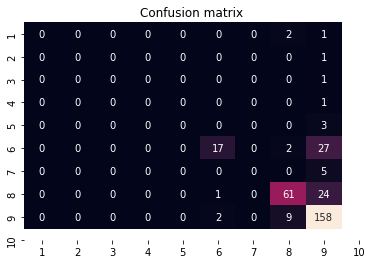

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Precision:   0.35
Recall:   0.24
F1-measure:   0.26
Accuracy:   0.70
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.82      0.50      0.62        46
         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


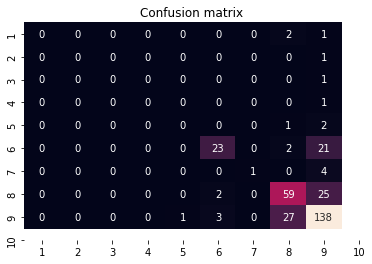

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Precision:   0.30
Recall:   0.27
F1-measure:   0.28
Accuracy:   0.77
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.88      0.61      0.72        46
           8       0.33      0.20      0.25         5
           9       0.75      0.79      0.77        86
          10       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


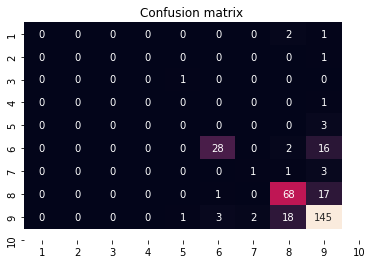

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.37
Recall:   0.23
F1-measure:   0.25
Accuracy:   0.72
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.86      0.26      0.40        46
           8       1.00      0.20      0.33         5
           9       0.82      0.65      0.73        86
          10       0.69      0.94      0.79       169

    accuracy                           0.72       315
   macro avg       0.37      0.23      0.25       315
weighted avg       0.73      0.72

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


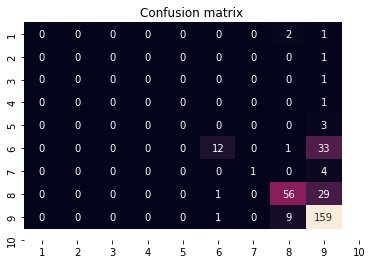

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Precision:   0.28
Recall:   0.26
F1-measure:   0.27
Accuracy:   0.74
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.61      0.61      0.61        46
           8       0.33      0.20      0.25         5
           9       0.81      0.73      0.77        86
          10       

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


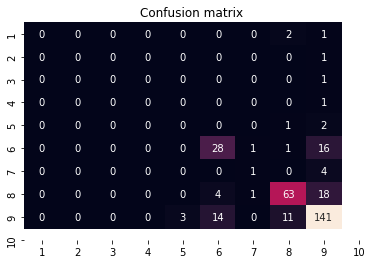

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
Precision:   0.31
Recall:   0.26
F1-measure:   0.27
Accuracy:   0.73
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.71      0.63      0.67        46
           8       0.50      0.20      0.29         5
           9       0.81      0.58      0.68        86
          10       0.74      0.89      0.81       169

    accuracy                           0.73       315
   macro avg       0.31      0.26      0.27       315
weighted avg       0.73    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


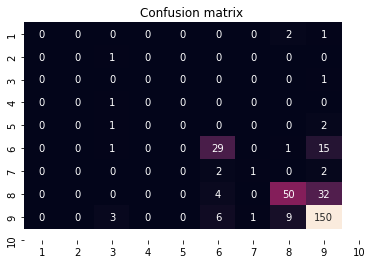

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Precision:   0.28
Recall:   0.25
F1-measure:   0.26
Accuracy:   0.70
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.61      0.61      0.61        46
           8       0.50      0.20      0.29         5
           9       0.70      0.71      0.71        86
          10     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


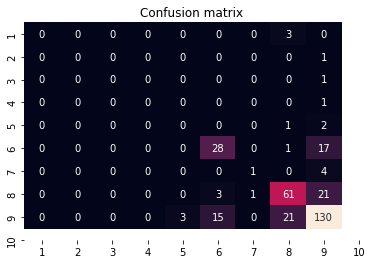

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')
Precision:   0.29
Recall:   0.24
F1-measure:   0.25
Accuracy:   0.70
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.69      0.39      0.50        46
           8       0.50      0.20      0.29         5
           9       0.68      0.70      0.69        86
          10       0.72      0.84      0.77       169

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


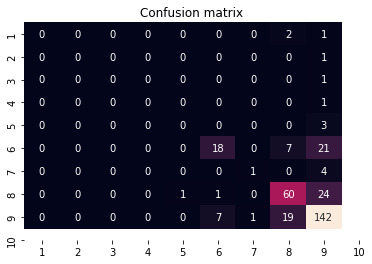

In [14]:
for classif in clflist:
    clf_place = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf_place', classif),
    ])
    for i in range(10):
      clf_place.fit(x_t, x_e)
    predictions = clf_place.predict(y_t)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(y_e, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(y_e, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(y_e, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(y_e, predictions)))
    print(classification_report(y_e, predictions))
    labels = clf_place.classes_
    sns.heatmap(data=confusion_matrix(y_e, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:   0.37
Recall:   0.23
F1-measure:   0.25
Accuracy:   0.72
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.86      0.26      0.40        46
           8       1.00      0.20      0.33         5
           9       0.82      0.65      0.73        86
          10       0.69      0.94      0.79       169

    accuracy                           0.72       315
   macro avg       0.37      0.23      0.25       315
weighted avg       0.73      0.72      0.69       315



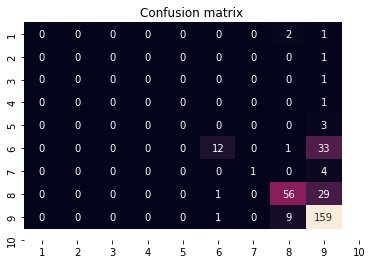

In [19]:
clf_place = Pipeline([
('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=10000)),
('tfidf', TfidfTransformer(sublinear_tf=True)),
#('reducer', TruncatedSVD(n_components=Val3)),
('clf_place', SVC()),
])

clf_place.fit(x_t, x_e)
predictions = clf_place.predict(y_t)
print("Precision: {0:6.2f}".format(precision_score(y_e, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_e, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_e, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_e, predictions)))
print(classification_report(y_e, predictions))
labels = clf_place.classes_
sns.heatmap(data=confusion_matrix(y_e, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [42]:
def set_kat(n):
  if n == 10:
    return "Благоустройство и инфраструктура"
  elif n == 9:  
    return "Дороги"
  elif n == 8: 
    return "Экология"
  elif n == 7:
    return "Жилищно-коммунальные услуги"
  elif n == 6:
    return "Социальная сфера"
  elif n == 5:
    return "Бизнес"
  elif n == 4: 
    return "Связь"
  elif n == 3:
    return "Коронавирус"
  elif n == 2:
    return "Сельское хозяйство"
  else:
    pass

In [48]:
out = []
to_predict = []
with open(r"test.csv", "r", encoding="utf-8") as file:
  data = file.readlines()
  ready_ids = []
  kol = 0
  for row in data[1:]:
    try:
      street, house, date, text, coords, id, lvl, all_tasks = row.split(";")
    except:
    # street = row[:row.find(";")]
    # row = row[row.find(";") + 1:]
    # house = row[:row.find(";")]
    # row = row[row.find(";") + 1:]
    # date = row[:row.find(";")]
    # row = row[row.find(";") + 1:]
    # all_tasks = row[row.rfind(";") + 1:]
    # row = row[:row.rfind(";")]
    # lvl = row[row.rfind(";") + 1:]
    # row = row[:row.rfind(";")]
    # id = row[row.rfind(";") + 1:]
    # row = row[:row.rfind(";")]
    # coords = row[row.rfind(";") + 1:]
    # row = row[:row.rfind(";")]
    # text =  row

    # try:
    #     float(coords.split()[0])
    #     float(coords.split()[1])
    # except:
    #     kol += 1
      continue
    if id in ready_ids:
      pass
    else:
      for el in all_tasks[all_tasks.find("[") + 1:all_tasks.find("]")].split(", "):
        ready_ids.append(el)
      if coords != "NONE":
        result = clf_place.predict([text])
        out.append([street, house, date, text, coords, id, lvl, all_tasks[:-1], set_kat(result[0])])



In [49]:
out

[['Богдана Хмельницкого',
  '49',
  '30-10-2021',
  'Здравствуйте, почему холодные батареи?',
  '56.12676905 47.23197420208202',
  '1',
  '100',
  '[1]',
  'Благоустройство и инфраструктура'],
 ['И.Ф.Скворцова',
  '6',
  '30-10-2021',
  'Доброе утро. В первом подъезде на 5 этаже перегорела лампочка, просим устранить в ближайшее время.',
  '56.08085035 47.32187589400164',
  '2',
  '0',
  '[2, 31]',
  'Благоустройство и инфраструктура'],
 ['Ильи Тукташа',
  '7/8',
  '29-10-2021',
  'Здравствуйте, в 6 подъезде второй день нет света!',
  '56.13521435 47.25730915399754',
  '3',
  '-1000',
  '[3, 1397]',
  'Благоустройство и инфраструктура'],
 ['Гидростроителей',
  '6',
  '29-10-2021',
  'Уважаемая управляющая компания, в нашем дворе ( бульвар Гидростроителей дома №№ 4,6,8,10) уже больше двух недель болтаются сломанные качели. Дети на них виснут, что опасно для здоровья, да  и вид неприглядный. Убедительная просьба отремонтируйте качели, пожалуйста, в ближайшее время.',
  '56.1351824 47.2965

In [33]:
numpy.unique(out, return_counts=True)


(array([ 7,  9, 10]), array([ 360,  346, 2577]))

In [50]:
import csv
with open('out.csv', "w", encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';')
    for el in out:
      spamwriter.writerow(el)
     